# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives





At the end of the experiment, you will be able to:

* perform dimensionality reduction using Autoencoder
* understand the relationship between Autoencoder and PCA


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/aiml_batch_15/preview_videos/Experiment_1_2.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description


1. The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. 

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.



### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## Domain Information




Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)



## AI/ML Technique

### PCA

PCA is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.


### Autoencoder

An autoencoder is a feedforward, non-recurrent neural network which is similar to multilayer perceptron (MLP) – having an input layer, an output layer and one or more hidden layers connecting them. However, in an autoencoder the output layer has the same number of nodes as the input layer, and reconstructs its own inputs (instead of predicting the target value Y given inputs X). 


An autoencoder is made up of two components- the encoder and decoder network. The task of the encoder is to generate a lower dimensional embedding Z, which is referred to latent vector, or latent representation. After that, we have the decoder stage in which Z is reconstructed to X' prime, which is the same as X (input).


![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/6.png)






In this experiment we will train an autoencoder on MNIST dataset with 10 hidden neurons.  it would result in 10 dimension vector for each digit in MNIST dataset. Therefore, we see  that it is ultimately a feature extraction technique which is helping us to find representations for our data. This can then be directly fed to the other algorithms. 

### Setup Steps

In [1]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id="2100121"#@param{type:"string"}

In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="5142192291"#@param{type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U3W15_33_AutoEncoder_MNIST_B" #name of the notebook
def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


Before diving into the experiment let us try to understand some basic pytorch packages :


 **torchvision :**  This package is used to load and prepare the dataset. Using this package we can perform/ apply transformations on the input data.  

**transforms :**  This package is  used to perform preprocessing on images and operations sequentially. 

**nn :**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

The data loading in pytorch is performed using  Data loader from torch.utils package. It can be  separated in two parts:

1. Data must be wrapped on Dataset parent class where the methods get\_item and len must be overridden. Not that, the data is not loaded on memory by now.
2. The Data loader reads the data and puts it into memory.





### Importing required packages

In [5]:
# Importing torch packages
import torch.nn as nn

import torch
import torchvision
from torchvision import datasets, transforms

# Importing python packages
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Defining the Parameters

In [6]:
EPOCH = 10
batch_size = 64
LR = 0.005      
DOWNLOAD_MNIST = False
N_TEST_IMG = 15 # YOUR CODE HERE : Define number of images you want to test on.

### Loading MNIST Data

In [7]:
# Downloading the Training set
train_data = datasets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [14]:
# Downloading the Testing set
test_data = datasets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [15]:
# Loading the downloaded train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# Loading the downloaded test dataset
test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=True)

### Visulaizing one of the Training Data

Every image in MNIST is a tesnor. Since each image is of 28 * 28 pixels we get 28 * 28 size tensor.



torch.Size([60000, 28, 28])
torch.Size([60000])


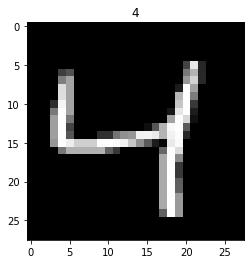

In [8]:
# YOUR CODE HERE : To get sense of how the data is, Plot a random image which is 28 * 28
# in which each pixel is randomly black, white or some shade of gray.

print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

### Defining the Autoencoder Model

Here we are constructing an autoencoder model where the encoding network component is made up of four layers with 128, 64,12, 3 nodes. We we are trying to compress the data into 3 features which can be easily visualized. Decoding network component is made up of four layers with 3, 12, 64, 128 nodes. Each layer output in encoding and decoding network are passed through Tanh activation function

In [17]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            # First fully connected layer
            # input [1 x 28 x 28]and output as 128 hidden nodes
            nn.Linear(28*28, 128),
            nn.Tanh(),
            # Second fully connected layer
            # Output of the first linear layer is input to the second linear layer with 64 hidden nodes
            nn.Linear(128, 64),
            nn.Tanh(),
            # Third fully connected layer
            # Output of the second linear layer is input to the second linear layer with 12 hidden nodes
            nn.Linear(64, 12),
            nn.Tanh(),
            # Fourth fully connected layer
            nn.Linear(12, 3),   # Compress to 3 feature representation
        )
        self.decoder = nn.Sequential(

            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # Compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

### Calling the instances of the network

In [18]:
autoencoder = AutoEncoder()
autoencoder

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

### Defining the loss function and optimizer

In [19]:
loss_func = nn.MSELoss() # YOUR CODE HERE : Initialize Mean Square Error Loss function.

# Initialization of Optimizer
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)

To get the feel of how an autoencoder works, let us first try to plot the original and decoded image at every iteration. In the initial stage of iteration the decoded images contains more noise. As the iteration increases the noise get decreased and we will be able to see that the decoded images are similar to the original images.

### Training the Model 

Applying Autoencoders on the train data and finding the loss on the train dataset

Epoch:  0 | train loss: 0.2315


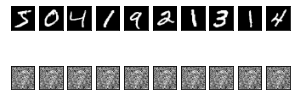

Epoch:  0 | train loss: 0.0641


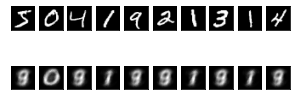

Epoch:  5 | train loss: 0.0349


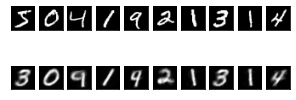

Epoch:  5 | train loss: 0.0360


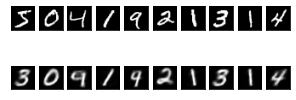

Epoch:  9 | train loss: 0.0332


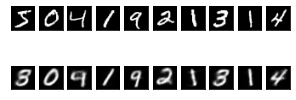

Epoch:  9 | train loss: 0.0337


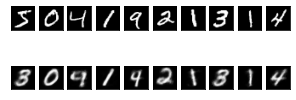

In [20]:
# Original data (first row) for viewing
N_TRAIN_IMG = 10
view_data = train_data.train_data[:N_TRAIN_IMG].view(-1, 28*28).type(torch.FloatTensor)

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        # print(x, y)
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)
        b_label = y               # batch label. We don't however use this label here since the label is the image itself i.e. b_y

        
        #  YOUR CODE HERE : Zero the parameter gradients using zero_grad() function
        optimizer.zero_grad()

        # Passing the data to the model (Forward Pass)
        encoded, decoded = autoencoder(b_x)

        # Calculating mean square error loss
        loss = loss_func(decoded, b_y) 
            
        # YOUR CODE HERE : Perform backward pass to compute the gradients
        loss.backward()

        # optimizer.step() updates the weights accordingly                    
        optimizer.step()                    

        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.item())
            # Plotting decoded image (second row)
            encoded_data, decoded_data = autoencoder(view_data)
            # Initialize figure
            f, a = plt.subplots(2, N_TRAIN_IMG, figsize=(5, 2))
            # Plotting orginal images
            for i in range(N_TRAIN_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
            # Plotting the decoded images
            for i in range(N_TRAIN_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); 

Applying Autoencoders on the test data and finding the loss on the test dataset

In [22]:
# Original data (first row) for viewing
view_data = test_data.test_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.

for b_x in range(EPOCH):
    for step, (x, y) in enumerate(test_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        # Passing the data to the model (Forward Pass)
        encoded, decoded = autoencoder(b_x)

        # Calculating mean square error loss
        loss = loss_func(decoded, b_y)
print(loss)

tensor(0.0358, grad_fn=<MseLossBackward>)


### Applying PCA on the data

In [23]:
from sklearn.decomposition import PCA
import numpy as np

pca =  PCA(3) # YOUR CODE HERE : Perform PCA for three components
      # HINT : Refer to PCA from SkLearn 
loss = 0

for step, (x, y) in enumerate(test_loader):
        b_x = (x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = (x.view(-1, 28*28))

        b_x = np.array(b_x) # YOUR CODE  HERE : Convert 'b_x'to numpy array
        b_y = np.array(b_y) # YOUR CODE  HERE : Convert 'b_y'to numpy array

        data_reduced =  pca.fit_transform(b_x) # YOUR CODE HERE : Fit and transform 'b_x' using 'pca' model defined above.
        data_reconstructed = pca.inverse_transform(data_reduced)
        loss += ((b_x - data_reconstructed) ** 2).mean()
print(loss)

7.347745716571808


Looking at the loss of PCA and Autoencoder on the test data we can say that  PCA loss is greater than autoencoder loss attributed to the nonlinearity reduction. It may not always be the case that an autoencoder can outperform a PCA representation of the data. If linear mapping can sufficiently explain the variance in the data without significant loss of detail, then a neural network may overkill a simpler models like PCA.


### Please answer the questions below to complete the experiment:




In [24]:
#@title The Encoder part of an Autoencoder will be equivalent to PCA if linear encoder, linear decoder, square error loss function with normalized inputs are used? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True"#@param ["","True","False"]


In [25]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [26]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [27]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [28]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [31]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 12297
Date of submission:  23 Dec 2020
Time of submission:  09:23:34
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
